# Lab 1

In this lab, we will explore the tensor operations underlying deep neural
networks. To get you started we have provided a "deep" network in this notebook.
Run the ipython notebook as you go along and answer the questions. Most
questions below have a *small* coding component (you only need to edit code when
specifically asked to).

# Assigned reading:
Chapters 1-3 of textbook

## Part 1: PyTorch DNNs
We'll first implement a simple convolutional neural network to classify MNIST
digits.

In [1]:
from loaders import *

# All of these blocks must be filled out in all notebooks in order for the lab
# to be marked complete.

answer(
    question='1.0',
    subquestion=f'What is your name?',
    answer= 'Jake Ronan',
    required_type=str,
)
answer(
    question='1.0',
    subquestion=f'What is your email address?',
    answer= 'jake_ronan@brown.edu',
    required_type=str,
)
answer(
    question='1.0',
    subquestion=f'What is your kerberos?',
    answer= 'jakronan',
    required_type=str,
)

1.0: What is your name?
	Jake Ronan
1.0: What is your email address?
	jake_ronan@brown.edu
1.0: What is your kerberos?
	jakronan


In [1]:
!pip uninstall numpy -y

Found existing installation: numpy 1.21.0
Uninstalling numpy-1.21.0:
  Successfully uninstalled numpy-1.21.0


In [1]:
!pip install numpy

In [4]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time, os
import matplotlib.pyplot as plt
import numpy as np
print(np.__version__)
from torch.utils.data.sampler import SubsetRandomSampler
%matplotlib inline

NUM_EPOCHS = 10

1.24.3


In [2]:
!pip install numpy==1.24.3

In [8]:
# Import the MNIST dataset
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

num_train = len(trainset)
indices = list(range(num_train))
split = 10000

# shuffle data
np.random.seed(6825)
np.random.shuffle(indices)

train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=50, sampler=train_sampler, shuffle=False)

validloader = torch.utils.data.DataLoader(trainset, batch_size=50, sampler=valid_sampler, shuffle=False)

testloader = torch.utils.data.DataLoader(testset, batch_size=50, shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, 5, padding = 2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(4, 8, 5, padding = 2)
        self.fc1 = nn.Linear(8 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 8 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

## Training the network

The code below trains for `NUM_EPOCHS` number of epochs and plots the training error. If you want (not graded), you can update this function to calculate the validation accuracy after each epoch so that you can plot it later. You can then play around with the number of epochs to see how it affects the validation accuracy (also not graded).

Note: The initialization below is not strictly necessary, as PyTorch will automoatically initialize the weights (including biases) for you. We've included initialization here so that if you run the cell more than once, you will start fresh.

In [9]:
training_acc_vect = np.zeros(NUM_EPOCHS)
valid_acc_vect = np.zeros(NUM_EPOCHS)

start_time = time.time()

# initialize weights and biases
nn.init.kaiming_uniform_(net.conv1.weight, nonlinearity = 'relu')
stdv = 1./np.sqrt(net.conv1.bias.size(0))
nn.init.uniform_(net.conv1.bias, -stdv, stdv)
nn.init.kaiming_uniform_(net.conv2.weight, nonlinearity = 'relu')
stdv = 1./np.sqrt(net.conv2.bias.size(0))
nn.init.uniform_(net.conv2.bias, -stdv, stdv)
nn.init.kaiming_uniform_(net.fc1.weight, nonlinearity = 'relu')
stdv = 1./np.sqrt(net.fc1.bias.size(0))
nn.init.uniform_(net.fc1.bias, -stdv, stdv)
nn.init.kaiming_uniform_(net.fc2.weight, nonlinearity = 'relu')
stdv = 1./np.sqrt(net.fc2.bias.size(0))
nn.init.uniform_(net.fc2.bias, -stdv, stdv)

# train network
for epoch in range(NUM_EPOCHS):  # loop over the dataset multiple times while training
    correct_train = 0
    total_train = 0
    
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data # list of [inputs, labels]
        #print(labels.shape)
        optimizer.zero_grad() # clear gradients
        outputs = net(inputs) # forward step
        loss = criterion(outputs, labels)
        loss.backward() # backprop
        optimizer.step() # optimize weights

        # print statistics
        duration = time.time() - start_time
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    training_acc = correct_train / total_train * 100
    training_acc_vect[epoch] = training_acc
    
    print('Accuracy of the network on the 50000 training images after epoch %d: %.2f %% (%.1f sec)' % (
        epoch + 1, training_acc, duration))
    
    # your code here to calculate the validation error after each epoch

# Validation accuracy calculation
    correct_valid = 0
    total_valid = 0
    
    for data in validloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_valid += labels.size(0)
        correct_valid += (predicted == labels).sum().item()
    
    valid_acc = correct_valid / total_valid * 100
    valid_acc_vect[epoch] = valid_acc
    
    print('Accuracy of the network on the validation images after epoch %d: %.2f %%' % (
        epoch + 1, valid_acc))

print('Finished Training')

# Test accuracy calculation - only once after training
correct_test = 0
total_test = 0

for data in testloader:
    inputs, labels = data
    outputs = net(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total_test += labels.size(0)
    correct_test += (predicted == labels).sum().item()

test_acc = correct_test / total_test * 100
print('Final accuracy of the network on the test images: %.2f %%' % test_acc)

Accuracy of the network on the 50000 training images after epoch 1: 74.62 % (107.4 sec)
Accuracy of the network on the validation images after epoch 1: 89.01 %
Accuracy of the network on the 50000 training images after epoch 2: 91.45 % (220.5 sec)
Accuracy of the network on the validation images after epoch 2: 92.23 %
Accuracy of the network on the 50000 training images after epoch 3: 93.50 % (339.1 sec)
Accuracy of the network on the validation images after epoch 3: 93.91 %
Accuracy of the network on the 50000 training images after epoch 4: 94.74 % (460.9 sec)
Accuracy of the network on the validation images after epoch 4: 94.40 %
Accuracy of the network on the 50000 training images after epoch 5: 95.50 % (569.5 sec)
Accuracy of the network on the validation images after epoch 5: 95.28 %
Accuracy of the network on the 50000 training images after epoch 6: 96.02 % (675.5 sec)
Accuracy of the network on the validation images after epoch 6: 96.04 %
Accuracy of the network on the 50000 tra

Final Training Accuracy: 97.416
Final Validation Accuracy: 96.92


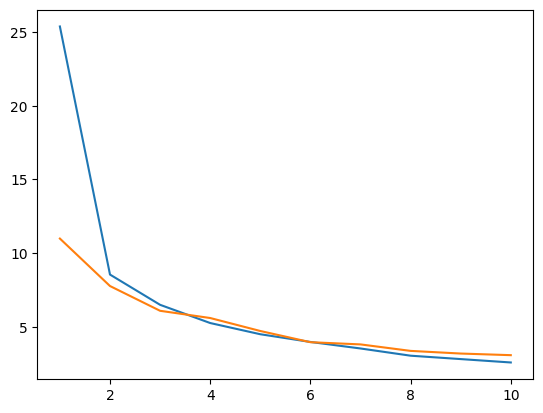

In [11]:
epoch_vect = np.linspace(1, NUM_EPOCHS, NUM_EPOCHS)

plt.figure(1)
plt.plot(epoch_vect, 100-training_acc_vect, label='Training Error')

print("Final Training Accuracy: %g" % (training_acc))

# Your code here to plot validation error
plt.plot(epoch_vect, 100-valid_acc_vect, label='Validation Error')

print("Final Validation Accuracy: %g" % (valid_acc))


In [8]:
from loaders import *
answer(
    question='1.1',
    subquestion="""
    The training accuracy is always a good indicator of the model performance on
    unseen data.
    """,
    answer= 'False',
    required_type=('True', 'False'),
)
answer(
    question='1.1',
    subquestion="""
    Which accuracy is the better indicator of the model performance on unseen
    data?
    """,
    answer= 'Test Accuracy',
    required_type=('Training Accuracy', 'Test Accuracy'),
)
answer(
    question='1.1',
    subquestion="""
    You have trained and tested the model on images give with white digits on a
    black background. However, you now want to use the model to classify images
    with black digits on a white background. How would you expect the model's
    accuracy to change?
    """,
    answer= 'Accuracy Decrease',
    required_type=('Accuracy Increase', 'Accuracy Decrease', 'No Change'),
)

answer(
    question='1.1',
    subquestion="""
    The white-with-black-background images are from the _____ distribution
    compared to your training and testing data.
    """,
    answer= 'Same',
    required_type=('Same', 'Different'),
)

PATH = './my_mnist_net.pth'
torch.save(net.state_dict(), PATH)

1.1: 
    The training accuracy is always a good indicator of the model performance on
    unseen data.
    
	False
1.1: 
    Which accuracy is the better indicator of the model performance on unseen
    data?
    
	Test Accuracy
1.1: 
    You have trained and tested the model on images give with white digits on a
    black background. However, you now want to use the model to classify images
    with black digits on a white background. How would you expect the model's
    accuracy to change?
    
	Accuracy Decrease
1.1: 
    The white-with-black-background images are from the _____ distribution
    compared to your training and testing data.
    
	Same


Run inference using the trained model and print the training, validation and test accuracies.

In [14]:
from loaders import *

loaded_net = Net() # put path to model file here.

# def eval_model(PATH, trainloader, validloader, testloader):

    

#     # your code here
#     training_accuracy = 0
#     validation_accuracy = 0
#     test_accuracy = 0

#     return training_accuracy, validation_accuracy, test_accuracy

# training_accuracy, validation_accuracy, test_accuracy = eval_model(PATH = './my_mnist_net.pth', trainloader, validloader, testloader)
# print('Training Accuracy: %g' % training_accuracy)        
# print('Validation Accuracy: %g' % validation_accuracy)
# print('Test Accuracy: %g' % test_accuracy)

def eval_model(PATH, trainloader, validloader, testloader):
    # Load the saved model
    loaded_net = Net()
    loaded_net.load_state_dict(torch.load(PATH))
    loaded_net.eval()  # Set to evaluation mode
    
    accuracies = []
    
# Evaluate on all three datasets
    for loader in [trainloader, validloader, testloader]:
        correct = 0
        total = 0
        
        for data in loader:
            images, labels = data
            outputs = loaded_net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        accuracy = correct / total * 100
        accuracies.append(accuracy)
    
    return accuracies[0], accuracies[1], accuracies[2]  # Return training, validation, test accuracies
    
PATH = './my_mnist_net.pth'

training_accuracy, validation_accuracy, test_accuracy = eval_model(PATH, trainloader, validloader, testloader)
print('Training Accuracy: %g' % training_acc)        
print('Validation Accuracy: %g' % valid_acc)
print('Test Accuracy: %g' % test_acc)

answer(
    question="1.2",
    subquestion="What is the training accuracy of the model?",
    answer= 97.416,
    required_type=Number,
)
answer(
    question="1.2",
    subquestion="What is the validation accuracy of the model?",
    answer= 96.92,
    required_type=Number,
)
answer(
    question="1.2",
    subquestion="What is the test accuracy of the model?",
    answer= 97.22,
    required_type=Number,
)

Training Accuracy: 97.416
Validation Accuracy: 96.92
Test Accuracy: 97.22
1.2: What is the training accuracy of the model?
	97.416
1.2: What is the validation accuracy of the model?
	96.92
1.2: What is the test accuracy of the model?
	97.22


Visualize the first test image and label. Similarly visualize the weights of the
filters used in the first convolutional layer.

(10000, 28, 28)
1.2: What number is shown in the first (index 0) image?
	7
1.2: What do the conv1 filters look like? Are there (or are there not) any discernable patterns?
	The conv1 filters look like pixelated squares of blue and green blocks. They almost look like the edge of the number 7. There are no discernable patterns.


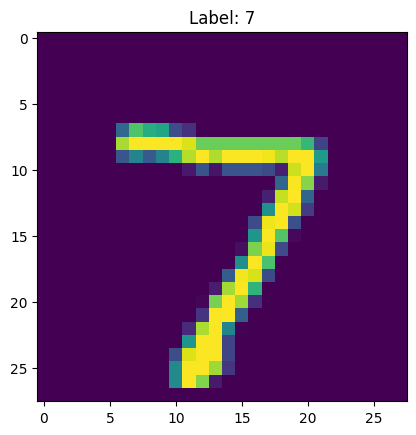

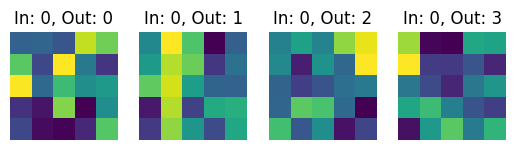

In [18]:
# download test set using torchvision
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.5,), (0.5,))])

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=1)

# convert to numpy array
images_array = torch.zeros((10000,28,28))
labels_array = torch.zeros(10000)
for i, data in enumerate(testloader, 0):
    image, label = data
    images_array[i,:,:] = image
    labels_array[i] = label
images_array = images_array.numpy()
labels_array = labels_array.numpy()
labels_array = labels_array.astype(int)
print(images_array.shape)

plt.figure(1)

# Your code to display one input image here (with its label)

plt.imshow(images_array[0])
plt.title(f'Label: {labels_array[0]}')

answer(
    question="1.2",
    subquestion="What number is shown in the first (index 0) image?",
    answer= 7,
    required_type=Number,
)

l1_filter = np.zeros((1,1,1,1)) # update

# Read the conv1 weights and apply detach().numpy() to 

l1_filter = net.conv1.weight.detach().numpy()

num_input_channels = l1_filter.shape[1]
num_out_channels = l1_filter.shape[0] # filters
plt.figure(2)
for x in range(num_out_channels): # filters
    for y in range(num_input_channels): # channels
        plt.subplot(num_input_channels, num_out_channels, y*num_out_channels + x + 1)
        # Your code for the filter here

        # For the filter visualization:
        plt.imshow(l1_filter[x, y, :, :])
        
        plt.title("In: %d, Out: %d" % (y, x))
        plt.axis('off')

answer(
    question="1.2",
    subquestion="What do the conv1 filters look like? Are there (or are there not) any discernable patterns?",
    answer= 'The conv1 filters look like pixelated squares of blue and green blocks. They almost look like the edge of the number 7. There are no discernable patterns.',
    required_type=str,
)